# About Kmeans Clustering
Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering

# 1.Import Libraries

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans

# 2.Load Dataset

In [2]:
df = pd.read_csv("segmentation data.csv")
print("Dataset Loaded..")

Dataset Loaded..


# 3. Data Anaysis

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.shape

(2000, 8)

In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [7]:
df['Sex'].value_counts()

0    1086
1     914
Name: Sex, dtype: int64

In [8]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
df.Education.value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [10]:
df.duplicated().sum()

0

# 4. data Visualisation

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Nasir Hussain\Anaconda3\lib\site

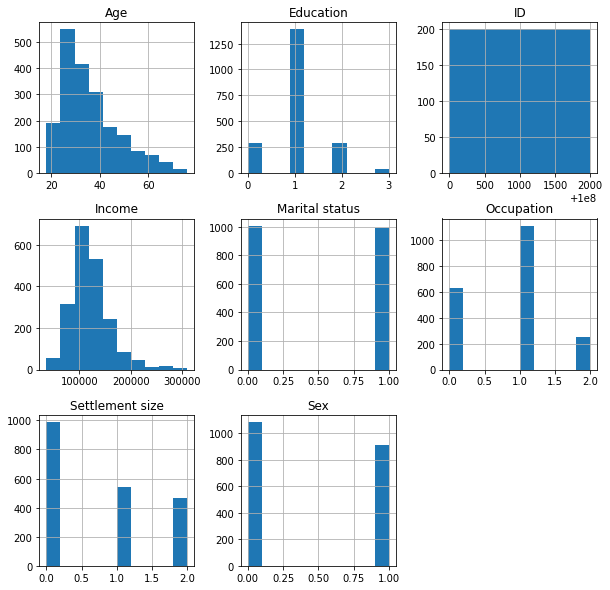

In [11]:
df.hist(figsize =(10,10))
plt.show()

In [61]:
# df.bar()
# plot.show()

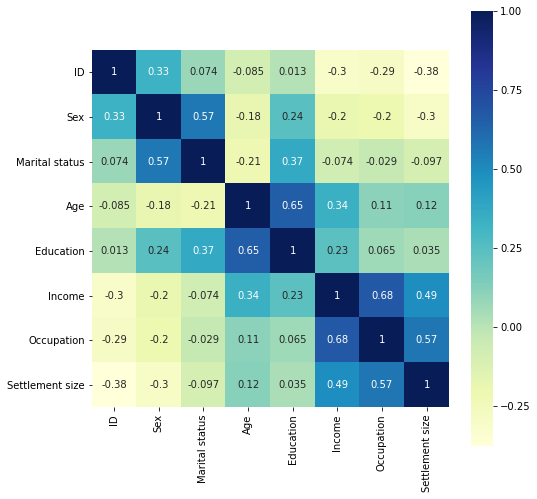

In [12]:
df = df[['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

# 5. scaling of data

In [13]:
# scaler = StandardScaler()
# df = scaler.fit_transform(df)

# 6.Applying Kmeans Clustering

In [14]:
def doKmeans(x, nclust=3):
    
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
#     cent = model.cluster_centers_
    return (clust_labels)

In [15]:
clust_labels= doKmeans(df,2)
clust_labels

array([0, 1, 0, ..., 0, 0, 0])

In [16]:
df['KmeanCluters'] = clust_labels

In [17]:
# kmeans = pd.DataFrame(clust_labels)
# df.insert((df.shape[1]),'kmeans',kmeans)

df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KmeanCluters
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,0
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,0
1998,100001999,1,1,24,1,97968,0,0,0


In [19]:
df.head(n=10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KmeanCluters
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1
5,100000006,0,0,35,1,144848,0,0,1
6,100000007,0,0,53,1,156495,1,1,1
7,100000008,0,0,35,1,193621,2,1,1
8,100000009,0,1,61,2,151591,0,0,1
9,100000010,0,1,28,1,174646,2,0,1


In [20]:
def condition(x):
    if x == 0:
        x = "cluster0"
    elif x == 1:
        x = "cluster1"
    elif x == 2:
        x = "cluster2"
    else: 
        x = "cluster3"
    
    return x

# df["cluster_name"] = df["kmeans"].apply(lambda x: "cluster0" if x == 0 else "cluster1")
df["cluster_name"] = df["KmeanCluters"].apply(condition)

In [22]:
df.head(15)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KmeanCluters,cluster_name
0,100000001,0,0,67,2,124670,1,2,0,cluster0
1,100000002,1,1,22,1,150773,1,2,1,cluster1
2,100000003,0,0,49,1,89210,0,0,0,cluster0
3,100000004,0,0,45,1,171565,1,1,1,cluster1
4,100000005,0,0,53,1,149031,1,1,1,cluster1
5,100000006,0,0,35,1,144848,0,0,1,cluster1
6,100000007,0,0,53,1,156495,1,1,1,cluster1
7,100000008,0,0,35,1,193621,2,1,1,cluster1
8,100000009,0,1,61,2,151591,0,0,1,cluster1
9,100000010,0,1,28,1,174646,2,0,1,cluster1


In [23]:
df[df['cluster_name'] == 'cluster0']

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KmeanCluters,cluster_name
0,100000001,0,0,67,2,124670,1,2,0,cluster0
2,100000003,0,0,49,1,89210,0,0,0,cluster0
10,100000011,1,1,25,1,108469,1,0,0,cluster0
11,100000012,1,1,24,1,127596,1,0,0,cluster0
12,100000013,1,1,22,1,108687,1,2,0,cluster0
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,0,cluster0
1996,100001997,1,1,27,1,117744,1,0,0,cluster0
1997,100001998,0,0,31,0,86400,0,0,0,cluster0
1998,100001999,1,1,24,1,97968,0,0,0,cluster0


In [24]:
df[df['cluster_name'] == 'cluster1']


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KmeanCluters,cluster_name
1,100000002,1,1,22,1,150773,1,2,1,cluster1
3,100000004,0,0,45,1,171565,1,1,1,cluster1
4,100000005,0,0,53,1,149031,1,1,1,cluster1
5,100000006,0,0,35,1,144848,0,0,1,cluster1
6,100000007,0,0,53,1,156495,1,1,1,cluster1
...,...,...,...,...,...,...,...,...,...,...
1550,100001551,1,1,37,1,145140,1,1,1,cluster1
1583,100001584,1,1,31,1,138307,1,1,1,cluster1
1592,100001593,1,1,44,2,143343,1,1,1,cluster1
1594,100001595,1,0,33,1,138525,1,1,1,cluster1


# 7. Plotting Clusters

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Nasir Hussain\Anaconda3\lib\site

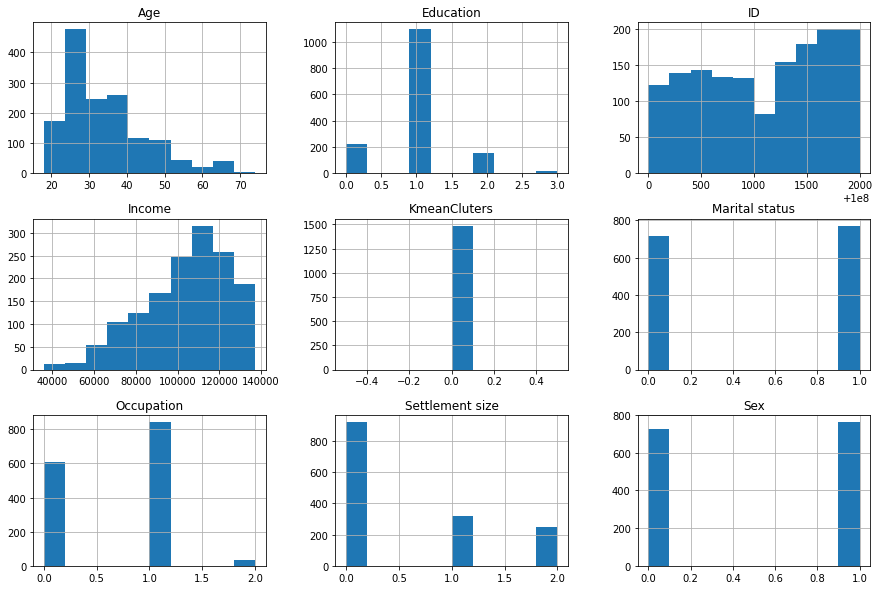

In [25]:
df[df['cluster_name'] == 'cluster0'].hist(figsize = (15,10))
plt.show()

**Cluster0**
1. Almost same number of male and female cutomers
2. both married and unmarried customers
3. Age group - 22 to 30 years
4. Income = 100000 to 120000

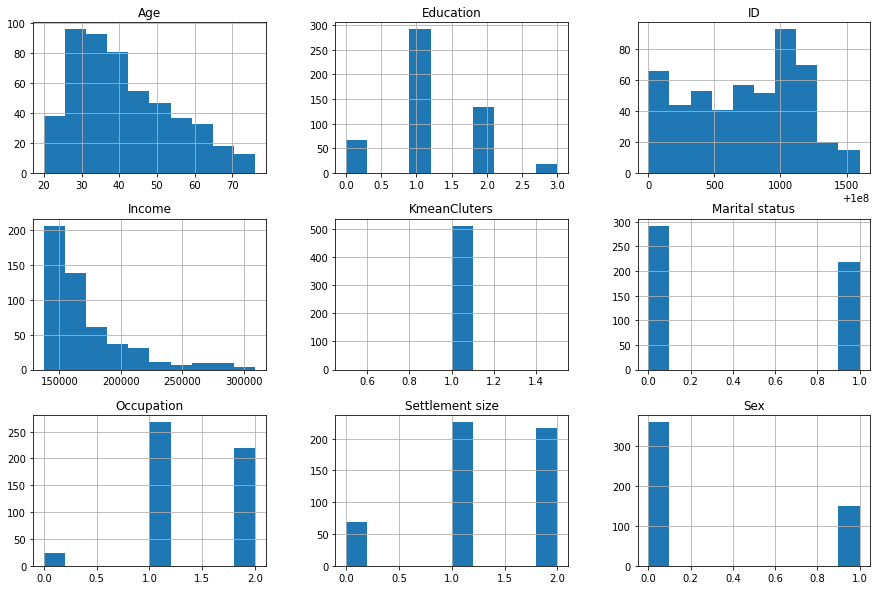

In [80]:
df[df['cluster_name'] == 'cluster1'].hist(figsize = (15,10))
plt.show()

**Cluster1**
1. mostly female customers
2. mostly unmarried customers
3. Age group - 25 to 35 years
4. Income - 120000 to 160000

# 8.Accuracy score of algorithm

In [81]:
from sklearn.metrics import accuracy_score
print("Accuracy score for kmeans algorithm is",accuracy_score(clust_labels,df['KmeanCluters']))

Accuracy score for kmeans algorithm is 1.0


# Conclusion:
1. Kmeans clustering is very much efficient to clustering customers because accuracy score is 1.0


In [ ]:
np.arange(16).reshape(4,4)